<a href="https://colab.research.google.com/github/leedain0301/MiniProject_01/blob/main/Mini_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from google.colab import files
upload = files.upload()

Saving vgames2.csv to vgames2.csv


# **Data Description**

- Name : 게임의 이름입니다.
- Platform : 게임이 지원되는 플랫폼의 이름입니다.
- Year : 게임이 출시된 연도입니다.
- Genre : 게임의 장르입니다.
- Publisher : 게임을 배급한 회사입니다.
- NA_Sales : 북미지역에서의 출고량입니다.
- EU_Sales : 유럽지역에서의 출고량입니다.
- JP_Sales : 일본지역에서의 출고량입니다.
- Other_Sales : 기타지역에서의 출고량입니다.

In [ ]:
data = pd.read_csv('vgames2.csv')
data.head()

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [ ]:
df = pd.DataFrame(data)
df.drop(labels='Unnamed: 0', axis =1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [ ]:
# 중복값 1개 제거 후 index를 재정렬
df = df.drop_duplicates()
df.duplicated().sum()
df.reset_index()
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [ ]:
df.isnull().sum()

Name             0
Platform         0
Year           270
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [ ]:
df['Year'] = df['Year'].fillna(0)
df['Genre'] = df['Genre'].fillna('None')
df['Publisher'] = df['Publisher'].fillna('None')

df.isnull().sum()

<ipython-input-25-f23e2bc015f4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Year'].fillna(0)
<ipython-input-25-f23e2bc015f4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Genre'] = df['Genre'].fillna('None')
<ipython-input-25-f23e2bc015f4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64


```
# Q. 지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답을 하셔야합니다.
# 1.지역은 어떻게 구분했나요?
  # 북미지역/유럽지역/일본지역/기타지역 
# 2.지역별로 선호하는 게임의 장르를 파악했나요?
# 3.지역별로 선호하는 게임의 장르가 왜 같다고/다르다고 생각했나요?
```



In [ ]:
def str_to_float(data):
  str_need_change = data
  if 'K' in str_need_change:
    str_need_change.replace('K', '')
    str_need_change = float(str_need_change.replace('K', ''))
    return str_need_change/1000
  elif 'M' in str_need_change:
    str_need_change = str_need_change.replace('M', '')
    return float(str_need_change)
  else:
    return float(str_need_change)

In [ ]:
df['NA_Sales'] = df.NA_Sales.apply(str_to_float) 
df['EU_Sales'] = df.EU_Sales.apply(str_to_float) 
df['JP_Sales'] = df.JP_Sales.apply(str_to_float) 
df['Other_Sales'] = df.Other_Sales.apply(str_to_float) 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16597 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16597 non-null  object 
 1   Platform     16597 non-null  object 
 2   Year         16597 non-null  float64
 3   Genre        16597 non-null  object 
 4   Publisher    16597 non-null  object 
 5   NA_Sales     16597 non-null  float64
 6   EU_Sales     16597 non-null  float64
 7   JP_Sales     16597 non-null  float64
 8   Other_Sales  16597 non-null  float64
dtypes: float64(5), object(4)
memory usage: 1.8+ MB


In [ ]:
local_df = df.drop(labels='Year',axis=1,inplace=False).copy()
local_df = local_df.groupby('Genre').sum()

local_NA = local_df['NA_Sales'].sort_values(ascending=False)
local_EU = local_df['EU_Sales'].sort_values(ascending=False)
local_JP = local_df['JP_Sales'].sort_values(ascending=False)
local_O = local_df['Other_Sales'].sort_values(ascending=False)
local_df

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,874.81,522.16,157.90,186.45
Adventure,105.66,64.05,51.95,16.81
Fighting,223.20,101.22,87.34,36.64
Misc,408.05,212.36,105.27,74.04
None,20.61,13.12,12.88,5.54
Platform,446.44,201.61,130.65,51.53
Puzzle,123.35,50.73,56.87,12.52
Racing,357.19,237.10,56.40,77.10
Role-Playing,319.54,183.58,344.95,56.96


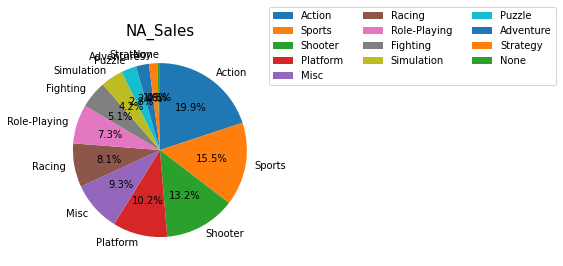

<Figure size 720x216 with 0 Axes>

In [57]:
ratio = local_NA
labels = local_NA.index

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=90, counterclock=False)
plt.title("NA_Sales", fontsize=15)
plt.legend(loc=(1, 0.8),ncol=3) 
plt.figure(figsize=(10,3))
plt.show()

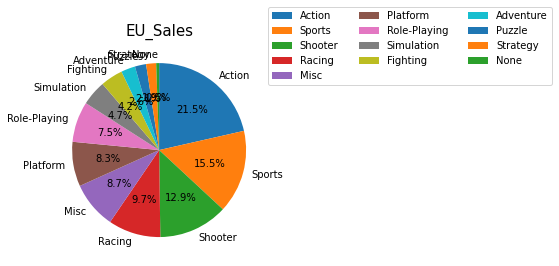

In [ ]:
ratio = local_EU
labels = local_EU.index

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=90, counterclock=False)
plt.title("EU_Sales", fontsize=15)
plt.legend(loc=(1, 0.8),ncol=3) 
plt.show()

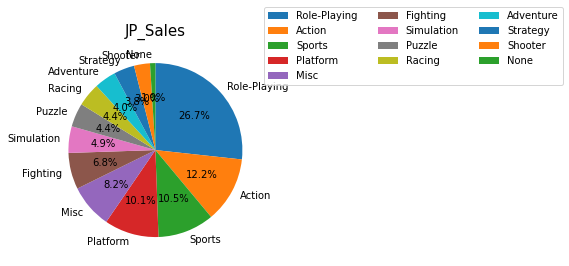

In [ ]:
ratio = local_JP
labels = local_JP.index

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=90, counterclock=False)
plt.title("JP_Sales", fontsize=15)
plt.legend(loc=(1, 0.8),ncol=3) 
plt.show()

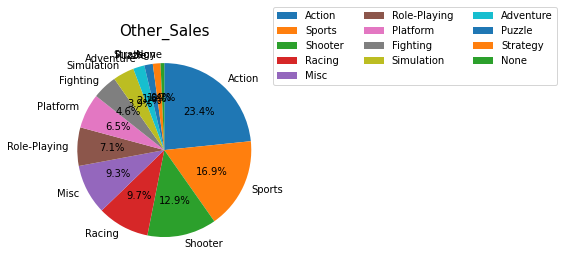

In [ ]:
ratio = local_O
labels = local_O.index

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=90, counterclock=False)
plt.title("Other_Sales", fontsize=15)
plt.legend(loc=(1, 0.8),ncol=3) 
plt.show()



```
# Q.연도별 게임의 트렌드가 있을까 라는 질문에 대답을 하셔야합니다.
# 1.트렌드는 어떤 것을 기준으로 파악했나요?
# 2.연도별로 트렌드가 존재하나요?
# 3.왜 존재한다/존재하지 않는다고 생각했나요?
```



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16597 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16597 non-null  object 
 1   Platform     16597 non-null  object 
 2   Year         16597 non-null  float64
 3   Genre        16597 non-null  object 
 4   Publisher    16597 non-null  object 
 5   NA_Sales     16597 non-null  float64
 6   EU_Sales     16597 non-null  float64
 7   JP_Sales     16597 non-null  float64
 8   Other_Sales  16597 non-null  float64
dtypes: float64(5), object(4)
memory usage: 1.8+ MB


In [ ]:
Year_df = df.copy()
Year_df.loc[(Year_df.Year <= 23),'Year'] = Year_df.Year + 2000
Year_df.loc[(Year_df.Year > 23) & (Year_df.Year < 1900),'Year'] = Year_df.Year + 1900

Year_df['Year'] = Year_df['Year'].astype(int)
Year_df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16594,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00
16595,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [ ]:
Year_df['total'] = Year_df['NA_Sales'] + Year_df['EU_Sales'] + Year_df['JP_Sales'] + Year_df['Other_Sales']
Year_df = Year_df[['Year','Genre','total']]
Year_df = Year_df.groupby(['Year', 'Genre'], as_index=False).sum()
Year_df

,Year,Genre,total
0,1980,Action,0.34
1,1980,Fighting,0.77
2,1980,Misc,2.70
3,1980,None,0.50
4,1980,Shooter,7.07
...,...,...,...
402,2016,Sports,14.63
403,2016,Strategy,0.52
404,2017,Action,0.01
405,2017,Role-Playing,0.04


In [ ]:
pivot = Year_df.pivot('Genre', 'Year', 'total')
pivot.fillna(0, inplace=True)

pivot.head()

Year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020
Genre,,,,,,,,,,,,,,,,,,,,,
Action,0.34,14.79,6.50,2.86,1.85,3.52,13.74,1.11,1.74,4.65,...,138.32,117.50,119.00,120.81,125.21,99.01,68.25,19.85,0.01,0.0
Adventure,0.00,0.00,0.00,0.40,0.00,0.00,0.00,4.38,0.00,0.00,...,20.67,16.57,15.88,5.90,6.61,6.09,8.01,1.81,0.00,0.0
Fighting,0.77,0.00,0.00,0.00,0.00,1.05,0.00,5.42,0.00,0.00,...,32.18,14.88,22.11,9.53,7.23,16.15,7.78,3.85,0.00,0.0
Misc,2.70,0.00,0.87,2.14,1.45,0.00,0.00,0.00,0.00,1.28,...,76.90,88.40,55.77,22.93,25.66,23.73,11.66,1.15,0.00,0.0
None,0.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1.26,9.05,0.89,1.19,14.35,0.00,2.43,0.00,0.00,0.0


Text(0.5, 1.0, 'heat map')

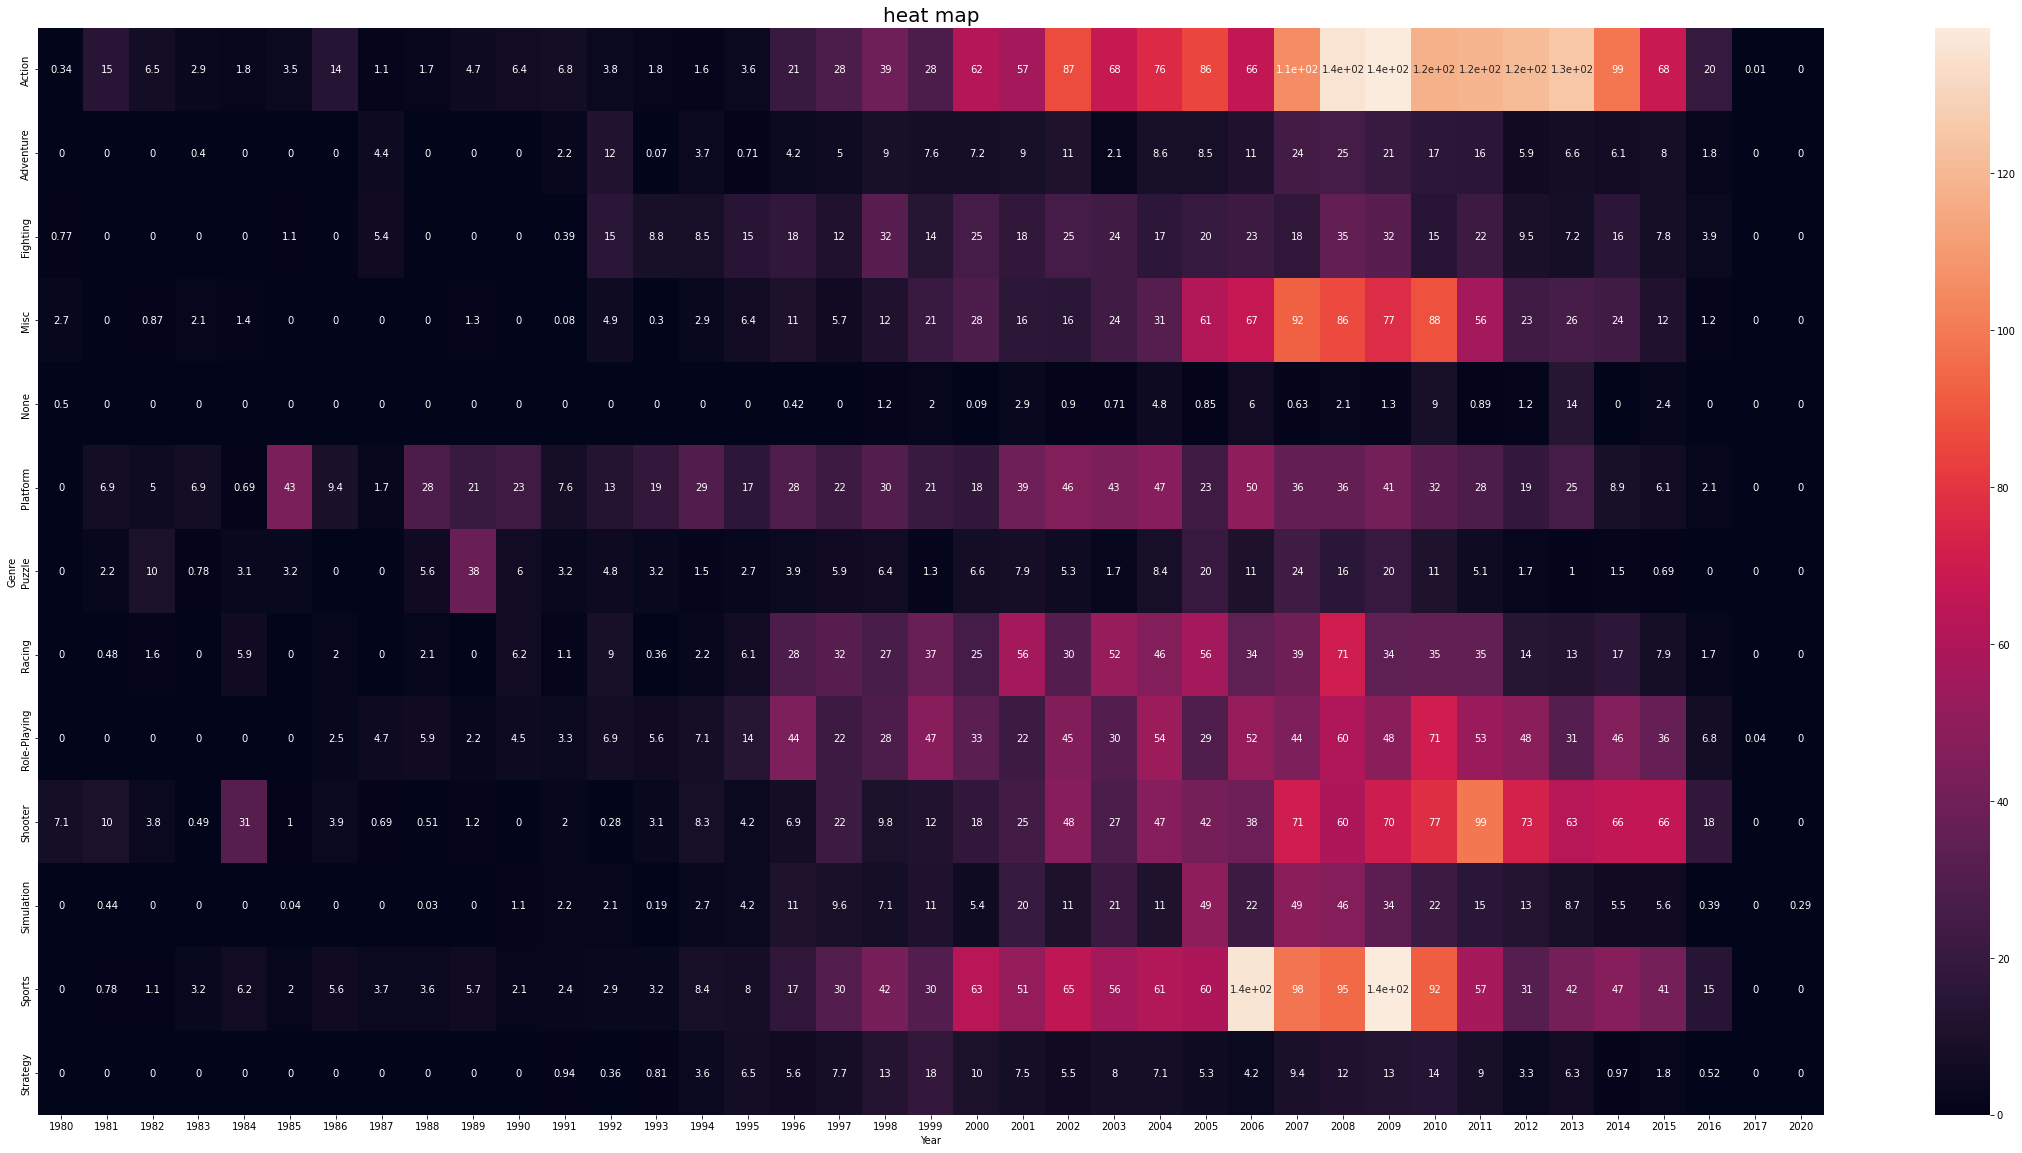

In [ ]:
fig = plt.figure()
fig.set_size_inches(40, 20)
sns.heatmap(pivot, annot=True)
plt.title('heat map', fontsize=20)